In [1]:
import pandas as pd
import requests
import plotly.express as px

In [2]:
cities = ["Mont Saint Michel",
          "St Malo",
          "Bayeux",
          "Le Havre",
          "Rouen",
          "Paris",
          "Amiens",
          "Lille",
          "Strasbourg",
          "Chateau du Haut Koenigsbourg",
          "Colmar",
          "Eguisheim",
          "Besancon",
          "Dijon",
          "Annecy",
          "Grenoble",
          "Lyon",
          "Gorges du Verdon",
          "Bormes les Mimosas",
          "Cassis",
          "Marseille",
          "Aix en Provence",
          "Avignon",
          "Uzes",
          "Nimes",
          "Aigues Mortes",
          "Saintes Maries de la mer",
          "Collioure","Carcassonne",
          "Ariege",
          "Toulouse",
          "Montauban",
          "Biarritz",
          "Bayonne",
          "La Rochelle"]

# Scrape GPS Coordinates

In [3]:
base_url = "https://nominatim.openstreetmap.org/search?q={}&country=France&format=jsonv2"

In [4]:
lon = []
lat = []

In [5]:
i = 0
for city in cities:
    try:
        r = requests.get(base_url.format(city))
        lon.append(float(r.json()[0]['lon']))
        lat.append(float(r.json()[0]['lat']))
        print("{} done !".format(city))
    except:
        print("Couldn't find results for {}".format(city))
        i += 1

gps = dict(zip(cities,zip(lat,lon)))

# Information about the number of cities that could not be scraped
if i > 0:
    print("⚠️ {} cities were not scraped.".format(i))

Mont Saint Michel done !
St Malo done !
Bayeux done !
Le Havre done !
Rouen done !
Paris done !
Amiens done !
Lille done !
Strasbourg done !
Chateau du Haut Koenigsbourg done !
Colmar done !
Eguisheim done !
Besancon done !
Dijon done !
Annecy done !
Grenoble done !
Lyon done !
Gorges du Verdon done !
Bormes les Mimosas done !
Cassis done !
Marseille done !
Aix en Provence done !
Avignon done !
Uzes done !
Nimes done !
Aigues Mortes done !
Saintes Maries de la mer done !
Collioure done !
Carcassonne done !
Ariege done !
Toulouse done !
Montauban done !
Biarritz done !
Bayonne done !
La Rochelle done !


Below, we have the GPS coordinates of each of the places we were able to scrape.

`city` : (`lat`,`lon`)

In [6]:
print(gps)

{'Mont Saint Michel': (48.6359541, -1.511459954959514), 'St Malo': (48.649518, -2.0260409), 'Bayeux': (49.2764624, -0.7024738), 'Le Havre': (49.4938975, 0.1079732), 'Rouen': (49.4404591, 1.0939658), 'Paris': (48.8588897, 2.3200410217200766), 'Amiens': (49.8941708, 2.2956951), 'Lille': (50.6365654, 3.0635282), 'Strasbourg': (48.584614, 7.7507127), 'Chateau du Haut Koenigsbourg': (48.249489800000006, 7.34429620253195), 'Colmar': (48.0777517, 7.3579641), 'Eguisheim': (48.0447968, 7.3079618), 'Besancon': (47.2380222, 6.0243622), 'Dijon': (47.3215806, 5.0414701), 'Annecy': (45.8992348, 6.1288847), 'Grenoble': (45.1875602, 5.7357819), 'Lyon': (45.7578137, 4.8320114), 'Gorges du Verdon': (43.7496562, 6.3285616), 'Bormes les Mimosas': (43.1572172, 6.329253867921363), 'Cassis': (43.2140359, 5.5396318), 'Marseille': (43.2961743, 5.3699525), 'Aix en Provence': (43.5298424, 5.4474738), 'Avignon': (43.9492493, 4.8059012), 'Uzes': (44.0121279, 4.4196718), 'Nimes': (43.8374249, 4.3600687), 'Aigues Mo

# Scrape Weather for each destination city

In [7]:
dataset = pd.DataFrame(columns=['city_id' , 'name', 'latitude', 'longitude', 'main_weather', 'day_temperature', 'day_humidity','expected_rain'])

In [8]:
api_key = "822e12878a17f19f31b1638759f12e0c"
api_call = "https://api.openweathermap.org/data/2.5/onecall?"

In [9]:
i = 0
for city in gps:
    try:
        params = {
            'lat' : gps[city][0],
            'lon' : gps[city][1],
            'exclude' : "current,minutely,hourly",
            'units' : 'metric',
            'appid' : api_key,
        }
        
        r = requests.get(api_call,params=params).json()
        

        # Compute average day temperature
        temperatures = pd.Series([d['temp']['day'] for d in r['daily']])
        mean_temperature = temperatures.mean()  
        # Compute average day humidity
        humidity = pd.Series([d['humidity'] for d in r['daily']])
        mean_humidity = humidity.mean()  
        # Get the most probable weather of the day
        weathers = pd.Series([d['weather'][0]['main'] for d in r['daily']])
        main_weather = weathers.mode()[0]
        
        # Compute expected volume of rain
        expected_rain = 0
        # print(res)
        for d in r['daily']:
            if 'rain' in d.keys():
                expected_rain += d['pop'] * d['rain']

        # Fill up the DataFrame
        dataset.loc[i,'city_id'] = i
        dataset.loc[i,'name'] = city
        dataset.loc[i,'latitude'] = r['lat']
        dataset.loc[i,'longitude'] = r['lon']
        dataset.loc[i, 'main_weather'] = main_weather
        dataset.loc[i,'day_temperature'] = mean_temperature
        dataset.loc[i,'day_humidity'] = mean_humidity
        dataset.loc[i,'expected_rain'] = expected_rain
        
        print("{} done !".format(city))
        i += 1
    except:
        print("Could not find results for {}".format(city))        

Mont Saint Michel done !
St Malo done !
Bayeux done !
Le Havre done !
Rouen done !
Paris done !
Amiens done !
Lille done !
Strasbourg done !
Chateau du Haut Koenigsbourg done !
Colmar done !
Eguisheim done !
Besancon done !
Dijon done !
Annecy done !
Grenoble done !
Lyon done !
Gorges du Verdon done !
Bormes les Mimosas done !
Cassis done !
Marseille done !
Aix en Provence done !
Avignon done !
Uzes done !
Nimes done !
Aigues Mortes done !
Saintes Maries de la mer done !
Collioure done !
Carcassonne done !
Ariege done !
Toulouse done !
Montauban done !
Biarritz done !
Bayonne done !
La Rochelle done !


In [10]:
dataset.head()

,city_id,name,latitude,longitude,main_weather,day_temperature,day_humidity,expected_rain
0,0,Mont Saint Michel,48.636,-1.5115,Clear,15.12125,53.375,0.0264
1,1,St Malo,48.6495,-2.026,Clear,12.885,62.75,0
2,2,Bayeux,49.2765,-0.7025,Clear,13.48,59.5,0
3,3,Le Havre,49.4939,0.108,Clear,13.31,57.625,0
4,4,Rouen,49.4405,1.094,Clear,15.505,47.125,0


Now, we are going to define here what's the most important to us as far as "good temperature" is concerned.
For us, an **ideal** temperature would be:
- No (or little) rain,
- Not too much humidity, and
- a good heat

In [11]:
dataset = dataset.astype({'city_id': int,
                          'latitude': float,
                          'longitude': float,
                          'expected_rain': float,
                          'day_humidity' : float,
                          'day_temperature': float,
                         })

dataset.loc[:, 'inverted_rank'] = dataset['expected_rain'].rank(method='min', ascending=False).astype(int)

dataset = dataset.sort_values(by=['day_humidity','expected_rain','day_temperature'],ascending=[True,True,False]).reset_index(drop=True)
dataset

,city_id,name,latitude,longitude,main_weather,day_temperature,day_humidity,expected_rain,inverted_rank
0,17,Gorges du Verdon,43.7497,6.3286,Clouds,13.55750,30.250,2.0460,13
1,21,Aix en Provence,43.5298,5.4475,Clouds,16.48375,31.625,0.7332,19
2,5,Paris,48.8589,2.3200,Clear,15.91875,35.500,0.0000,26
3,22,Avignon,43.9492,4.8059,Clouds,16.78875,38.250,3.7728,11
4,15,Grenoble,45.1876,5.7358,Clear,17.59375,38.500,7.3562,5
5,24,Nimes,43.8374,4.3601,Clouds,16.17625,41.250,4.7421,8
6,14,Annecy,45.8992,6.1289,Clear,15.62500,41.375,0.7358,18
7,23,Uzes,44.0121,4.4197,Clouds,15.87750,42.000,6.1700,6
8,16,Lyon,45.7578,4.8320,Clear,16.15500,43.125,0.1624,21
9,20,Marseille,43.2962,5.3700,Clouds,15.35500,46.500,0.8580,17


In [12]:
print('The 5 best places for a trip next week are : ')
print()

for index, row in dataset[0:5].iterrows():
    print("{} - {} with a temperature of {:.2f}°C".format(row['name'],row['main_weather'],row['day_temperature']))

The 5 best places for a trip next week are : 

Gorges du Verdon - Clouds with a temperature of 13.56°C
Aix en Provence - Clouds with a temperature of 16.48°C
Paris - Clear with a temperature of 15.92°C
Avignon - Clouds with a temperature of 16.79°C
Grenoble - Clear with a temperature of 17.59°C


# Now let's plot the results

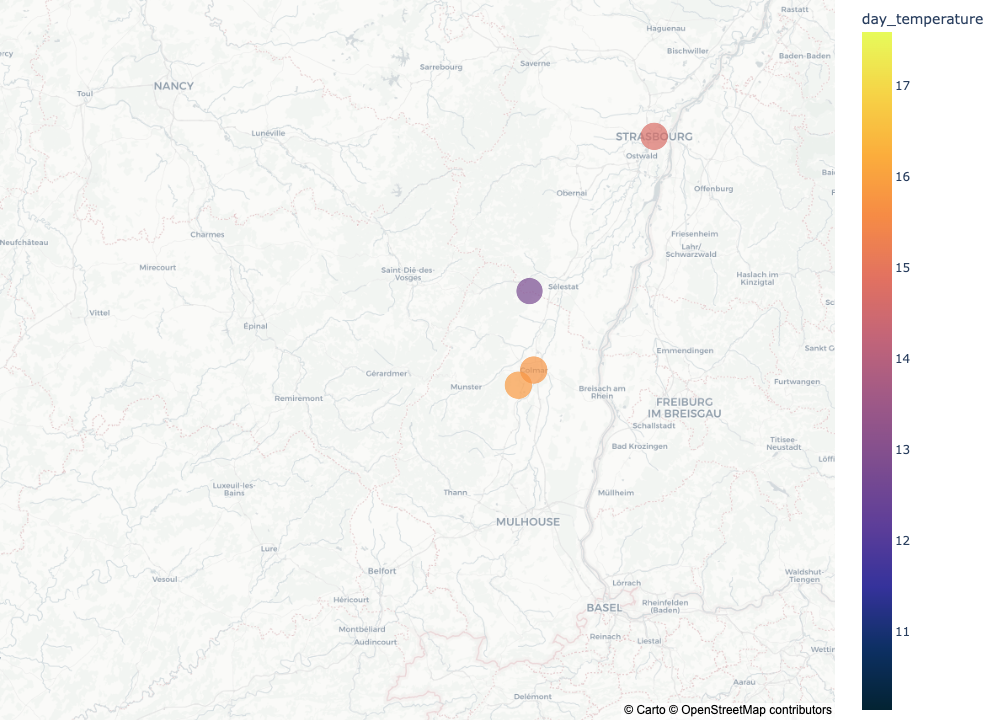

In [29]:
fig = px.scatter_mapbox(dataset, lat="latitude", lon="longitude", hover_name="name", hover_data=["day_temperature", "day_humidity","expected_rain"],
                        color="day_temperature",color_continuous_scale = 'thermal',size = 'inverted_rank', zoom=4.5, height=300)
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [14]:
dataset.to_csv('src/1_destinations.csv', index=False)